## New York City Taxi Dataset 2013

This notebook contains Data Analysis after Data Cleaning is done and both the trip data and fare data for October 2013 is merged into one dataset

In [1]:
# !pip3 install seaborn

### Importing the required libraries

In [2]:
import pandas as pd

import geopy
import geopy.distance as gd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

import matplotlib.pyplot as plt
import seaborn as sns

import math
import numpy as np

### Reading data from the cleaned and merged new york taxi data using pandas

In [3]:
taxi_trip_df = pd.read_csv('/data/shared/debdeep_guha/nyc_taxi_data/cleaned_full_taxi_data.csv')

In [4]:
taxi_trip_df.head()

,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,...,trip_dist_miles,trip_diff_seconds,avg_speed,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,740BD5BE61840BE4FE3905CC3EBE3E7E,E48B185060FB0FF49BE6DA43E69E624B,CMT,1,2013-10-01 12:44:29,2013-10-01 12:53:26,1,536,1.2,-73.974319,...,0.884191,537.0,8.044693,CRD,8.0,0.0,0.5,2.1,0.0,10.6
1,EA05309C30F375695F44C96108ACB10F,1D10D8AC5B07D80861761365A05A9AE2,CMT,1,2013-10-02 19:44:55,2013-10-02 20:03:55,1,1139,5.1,-73.981239,...,2.075469,1140.0,16.105263,CRD,18.0,1.0,0.5,3.0,0.0,22.5
2,EA05309C30F375695F44C96108ACB10F,1D10D8AC5B07D80861761365A05A9AE2,CMT,1,2013-10-02 22:01:18,2013-10-02 22:09:18,1,480,2.2,-74.002991,...,0.454633,480.0,16.500000,CRD,9.5,0.5,0.5,2.1,0.0,12.6
3,B36D7AB5B422EA1A0588EFD1D8155EF3,669F420B42A0739A5D1058184AD227ED,CMT,1,2013-10-03 12:14:35,2013-10-03 12:26:04,1,689,0.9,-73.967178,...,0.889170,689.0,4.702467,CRD,8.5,0.0,0.5,1.8,0.0,10.8
4,28172009F5513B25F4091C0929C4515D,ABE08BCFEBF3F5F7339CA2170EEC1DEE,CMT,1,2013-10-02 00:33:37,2013-10-02 01:06:16,1,1959,14.8,-73.784142,...,10.234611,1959.0,27.197550,CRD,43.0,0.5,0.5,11.0,0.0,55.0


In [5]:
# checking the column names in the dataset
taxi_trip_df.columns

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_time_in_secs', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'trip_dist_miles', 'trip_diff_seconds', 'avg_speed', 'payment_type',
       'fare_amount', 'surcharge', 'mta_tax', 'tip_amount', 'tolls_amount',
       'total_amount'],
      dtype='object')

In [6]:
# checking the length of the dataset
len(taxi_trip_df)

13895209

In [7]:
# the datatypes of all the columns in the dataset
taxi_trip_df.dtypes

medallion             object
hack_license          object
vendor_id             object
rate_code              int64
pickup_datetime       object
dropoff_datetime      object
passenger_count        int64
trip_time_in_secs      int64
trip_distance        float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
trip_dist_miles      float64
trip_diff_seconds    float64
avg_speed            float64
payment_type          object
fare_amount          float64
surcharge            float64
mta_tax              float64
tip_amount           float64
tolls_amount         float64
total_amount         float64
dtype: object

#### Converting `dropoff_datetime` and `pickup_datetime` into datetime from type object

In [8]:
taxi_trip_df['dropoff_datetime'] =  pd.to_datetime(taxi_trip_df['dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')
taxi_trip_df['pickup_datetime'] =  pd.to_datetime(taxi_trip_df['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

### Exploratory Analysis

#### Busiest Hours of October 2013

(We can identify that by the number of passengers availing a taxicab in a given hour)

##### Creating a new dataframe grouping by the hourly `pickup_datetime` 
##### Followed by calculating the total number of `passenger_count` 

In [9]:
busy_hrs_df = taxi_trip_df.groupby(taxi_trip_df['pickup_datetime'].dt.hour)['passenger_count'].sum().sort_values(ascending=False)
busy_hrs_df = busy_hrs_df.to_frame().reset_index()
busy_hrs_df = busy_hrs_df.rename(columns={'pickup_datetime':'hour'})
busy_hrs_df

,hour,passenger_count
0,19,1527755
1,20,1485507
2,21,1457095
3,18,1415671
4,22,1403155
5,23,1255801
6,14,1160884
7,17,1155502
8,12,1140740
9,13,1121129


In [10]:
# sorting the new dataframe based on the descending order of the hourly passenger count
busy_hrs_df= busy_hrs_df.sort_values('passenger_count', ascending=False)
busy_hrs_df

,hour,passenger_count
0,19,1527755
1,20,1485507
2,21,1457095
3,18,1415671
4,22,1403155
5,23,1255801
6,14,1160884
7,17,1155502
8,12,1140740
9,13,1121129


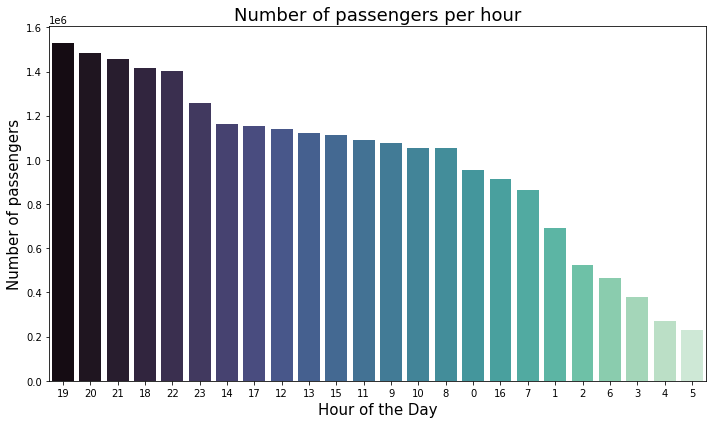

In [11]:
plt.figure(figsize=(10,6))
 
sns.barplot(x='hour',
            y="passenger_count", 
            data=busy_hrs_df, palette='mako',
            order=busy_hrs_df.sort_values('passenger_count', ascending=False)['hour'])

plt.xlabel("Hour of the Day", size=15)
plt.ylabel("Number of passengers (in millions)", size=15)
plt.title("Total number of passengers per hour for October 2013", size=18)
plt.tight_layout()
plt.show()

From the above plot we can say the busiest hours of the day is between 6 pm and 11 pm 

#### Busiest Location of October 2013

(We can identify that by the number of passengers availing a taxicab from a paticular pickup or dropoff location)

In [12]:
taxi_trip_df

,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,...,trip_dist_miles,trip_diff_seconds,avg_speed,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,740BD5BE61840BE4FE3905CC3EBE3E7E,E48B185060FB0FF49BE6DA43E69E624B,CMT,1,2013-10-01 12:44:29,2013-10-01 12:53:26,1,536,1.2,-73.974319,...,0.884191,537.0,8.044693,CRD,8.0,0.0,0.5,2.10,0.0,10.60
1,EA05309C30F375695F44C96108ACB10F,1D10D8AC5B07D80861761365A05A9AE2,CMT,1,2013-10-02 19:44:55,2013-10-02 20:03:55,1,1139,5.1,-73.981239,...,2.075469,1140.0,16.105263,CRD,18.0,1.0,0.5,3.00,0.0,22.50
2,EA05309C30F375695F44C96108ACB10F,1D10D8AC5B07D80861761365A05A9AE2,CMT,1,2013-10-02 22:01:18,2013-10-02 22:09:18,1,480,2.2,-74.002991,...,0.454633,480.0,16.500000,CRD,9.5,0.5,0.5,2.10,0.0,12.60
3,B36D7AB5B422EA1A0588EFD1D8155EF3,669F420B42A0739A5D1058184AD227ED,CMT,1,2013-10-03 12:14:35,2013-10-03 12:26:04,1,689,0.9,-73.967178,...,0.889170,689.0,4.702467,CRD,8.5,0.0,0.5,1.80,0.0,10.80
4,28172009F5513B25F4091C0929C4515D,ABE08BCFEBF3F5F7339CA2170EEC1DEE,CMT,1,2013-10-02 00:33:37,2013-10-02 01:06:16,1,1959,14.8,-73.784142,...,10.234611,1959.0,27.197550,CRD,43.0,0.5,0.5,11.00,0.0,55.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13895204,3FD555B8EA958A8AC0A50FCBEDED5CE2,A59A74F32FDFB59430AAC596A2B54FA6,CMT,1,2013-10-07 20:24:34,2013-10-07 20:30:22,1,347,1.0,-73.968300,...,0.761118,348.0,10.344828,CRD,6.0,0.5,0.5,1.00,0.0,8.00
13895205,F72C82AFFA243C164EA00B43398EDFCD,1B8B820092E36B6BDEF66B2B836A5E1F,CMT,1,2013-10-08 17:34:04,2013-10-08 17:42:27,3,502,1.1,-73.985168,...,0.855941,503.0,7.872763,CRD,7.0,1.0,0.5,2.10,0.0,10.60
13895206,400E7547B850AB2C980B02293A279988,265712C4B013561E39DA4EF5700BC8F0,CMT,1,2013-10-09 21:56:46,2013-10-09 22:03:43,1,416,1.8,-73.998978,...,1.552603,417.0,15.539568,CRD,8.0,0.5,0.5,1.80,0.0,10.80
13895207,C612423A09BF7298B817EBB674E7DC11,F3E5CC66E8544AF5FF67DFB70B6A7481,CMT,1,2013-10-10 02:11:50,2013-10-10 02:17:49,1,359,1.1,-73.985756,...,0.578131,359.0,11.030641,CRD,6.5,0.5,0.5,1.50,0.0,9.00


##### Initialize Nominatim API 

In [13]:
geolocator = Nominatim(user_agent="geoapiExercises")

##### Creating a new dataframe with the `passenger_count`  and the location coordinates 
##### Followed by creating new pickup and dropoff coordinates columns to store the formatted data

(Note: The newly formed `pickup_coordinates` and `dropoff_coordinates` will be passed into the `geolocator` initialised above to get the location details)

In [14]:
location_df = taxi_trip_df[['passenger_count', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']]
location_df['pickup_coordinates'] = taxi_trip_df['pickup_latitude'].round(2).astype(str) + ", " + taxi_trip_df['pickup_longitude'].round(2).astype(str)
location_df['dropoff_coordinates'] = taxi_trip_df['dropoff_latitude'].round(2).astype(str) + ", " + taxi_trip_df['dropoff_longitude'].round(2).astype(str) 

/home/ml/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/ml/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
location_df.head()

,passenger_count,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,pickup_coordinates,dropoff_coordinates
0,1,40.741859,-73.974319,40.742424,-73.991150,"40.74, -73.97","40.74, -73.99"
1,1,40.729141,-73.981239,40.719715,-73.943695,"40.73, -73.98","40.72, -73.94"
2,1,40.733540,-74.002991,40.727261,-74.005615,"40.73, -74.0","40.73, -74.01"
3,1,40.766563,-73.967178,40.755947,-73.976784,"40.77, -73.97","40.76, -73.98"
4,1,40.648621,-73.784142,40.672001,-73.976479,"40.65, -73.78","40.67, -73.98"


##### Busiest Dropoff Location

(Calculated by grouping the new `location_df` based on the `dropoff_coordinates` and adding the `passenger_count`, which will give us the number of passengers being dropped off at that location)

In [16]:
busy_dropoff_location_df = location_df.groupby(location_df['dropoff_coordinates'])['passenger_count'].sum().sort_values(ascending=False).head(10)
busy_dropoff_location_df = busy_dropoff_location_df.to_frame().reset_index()
busy_dropoff_location_df

,dropoff_coordinates,passenger_count
0,"40.76, -73.97",1316306
1,"40.76, -73.98",1313497
2,"40.75, -73.99",1202427
3,"40.75, -73.98",1138103
4,"40.74, -73.99",925988
5,"40.76, -73.99",859673
6,"40.77, -73.96",764390
7,"40.73, -73.99",706309
8,"40.77, -73.98",674396
9,"40.73, -74.0",651069


In [17]:
# generating an extra column calculating the geodesic distance formula from geopy
busy_dropoff_location_df['dropoff_location'] = busy_dropoff_location_df.apply(
    (lambda row: geolocator.reverse(row['dropoff_coordinates'])[0]),
    axis=1
)
busy_dropoff_location_df

,dropoff_coordinates,passenger_count,dropoff_location
0,"40.76, -73.97",1316306,"664, Lexington Avenue, Midtown East, Manhattan..."
1,"40.76, -73.98",1313497,"Rockefeller Center, 45, Rockefeller Plaza, Mid..."
2,"40.75, -73.99",1202427,"137, West 33rd Street, Herald Square, Manhatta..."
3,"40.75, -73.98",1138103,"35, East 38th Street, Murray Hill, Manhattan, ..."
4,"40.74, -73.99",925988,"10, East 21st Street, Flatiron District, Manha..."
5,"40.76, -73.99",859673,"341, West 45th Street, Theater District, Manha..."
6,"40.77, -73.96",764390,"Dallas BBQ, 1265, 3rd Avenue, Upper East Side,..."
7,"40.73, -73.99",706309,"51 Astor Place, East 9th Street, Manhattan Com..."
8,"40.77, -73.98",674396,"Central Park Outer Loop, Manhattan, New York C..."
9,"40.73, -74.0",651069,"Filomen D'agostino Residence Hall, 110, West 3..."


In [ ]:
print('Top 10 Busiest Dropoff Locations in New York City for October 2013')
for ind in busy_dropoff_location_df.index:
    print(busy_dropoff_location_df['dropoff_location'][ind])

##### Busiest Pickup Location

(Calculated by grouping the new `location_df` based on the `pickup_coordinates` and adding the `passenger_count`, which will give us the number of passengers being picked up at that location)

In [18]:
busy_pickup_location_df = location_df.groupby(location_df['pickup_coordinates'])['passenger_count'].sum().sort_values(ascending=False).head(10)
busy_pickup_location_df = busy_pickup_location_df.to_frame().reset_index()
busy_pickup_location_df

,pickup_coordinates,passenger_count
0,"40.76, -73.97",1443352
1,"40.75, -73.99",1299175
2,"40.76, -73.98",1205684
3,"40.75, -73.98",1130383
4,"40.74, -73.99",1065226
5,"40.76, -73.99",1052408
6,"40.73, -73.99",884853
7,"40.77, -73.98",803400
8,"40.77, -73.96",798167
9,"40.73, -74.0",768413


In [19]:
# generating an extra column calculating the geodesic distance formula from 
busy_pickup_location_df['pickup_location'] = busy_pickup_location_df.apply(
    (lambda row: geolocator.reverse(row['pickup_coordinates'])[0]),
    axis=1
)
busy_pickup_location_df

,pickup_coordinates,passenger_count,pickup_location
0,"40.76, -73.97",1443352,"664, Lexington Avenue, Midtown East, Manhattan..."
1,"40.75, -73.99",1299175,"137, West 33rd Street, Herald Square, Manhatta..."
2,"40.76, -73.98",1205684,"Rockefeller Center, 45, Rockefeller Plaza, Mid..."
3,"40.75, -73.98",1130383,"35, East 38th Street, Murray Hill, Manhattan, ..."
4,"40.74, -73.99",1065226,"10, East 21st Street, Flatiron District, Manha..."
5,"40.76, -73.99",1052408,"341, West 45th Street, Theater District, Manha..."
6,"40.73, -73.99",884853,"51 Astor Place, East 9th Street, Manhattan Com..."
7,"40.77, -73.98",803400,"Central Park Outer Loop, Manhattan, New York C..."
8,"40.77, -73.96",798167,"Dallas BBQ, 1265, 3rd Avenue, Upper East Side,..."
9,"40.73, -74.0",768413,"Filomen D'agostino Residence Hall, 110, West 3..."


In [ ]:
print('Top 10 Busiest Pickup Locations in New York City for October 2013')
for ind in busy_pickup_location_df.index:
    print(busy_pickup_location_df['pickup_location'][ind])

### Distribution of passengers per trip, payment type, fare and tip amounts

#### Passengers per Trip Distribution

In [20]:
taxi_trip_df['passenger_count'].value_counts()

1    9768533
2    1908783
5     788393
3     584234
6     568703
4     276563
Name: passenger_count, dtype: int64

In [ ]:
taxi_trip_df['passenger_count'].value_counts(normalize=True)

Text(0, 0.5, 'Number of Trips')

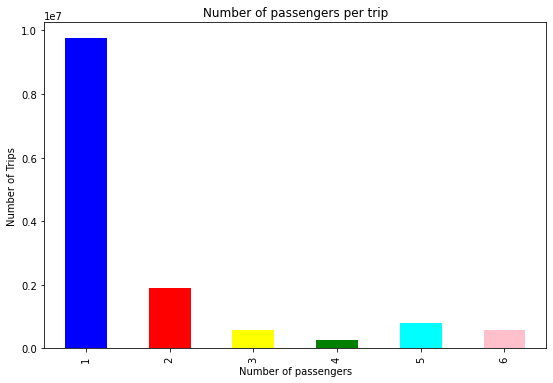

In [21]:
counts = taxi_trip_df['passenger_count'].value_counts().sort_index()
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
counts.plot.bar(ax = ax, color=['blue', 'red', 'yellow', 'green', 'cyan', 'pink'])
ax.set_title('Number of passengers per trip for October 2013')
ax.set_xlabel('Number of passengers') 
ax.set_ylabel('Number of Trips (in millions)')

From the above plot we can definitely say that around % of the taxicabs had only 1 passenger

#### Payment Type Distribution

In [22]:
taxi_trip_df['payment_type'].value_counts()

CRD    7797231
CSH    6031537
UNK      39094
NOC      20461
DIS       6886
Name: payment_type, dtype: int64

In [23]:
taxi_trip_df['payment_type'].value_counts(normalize=True)

CRD    0.561145
CSH    0.434073
UNK    0.002813
NOC    0.001473
DIS    0.000496
Name: payment_type, dtype: float64

Text(0, 0.5, 'Frequency of Payment Type used by Passengers')

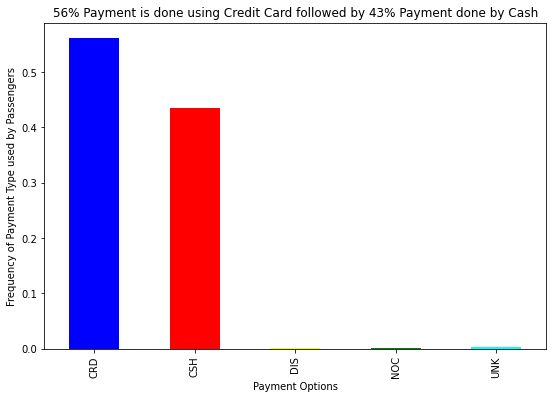

In [24]:
counts = taxi_trip_df['payment_type'].value_counts(normalize=True).sort_index()
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
counts.plot.bar(ax = ax, color=['blue', 'red', 'yellow', 'green', 'cyan'])
ax.set_title('56% Payment is done using Credit Card followed by 43% Payment done by Cash')
ax.set_xlabel('Payment Options') 
ax.set_ylabel('Frequency of Payment Type used by Passengers')

Credit cards and Cash are the most used payment option. 56% of such payments is done using Credit Card followed by 43% payment done by Cash

#### Fare Amount Distribution

/home/ml/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



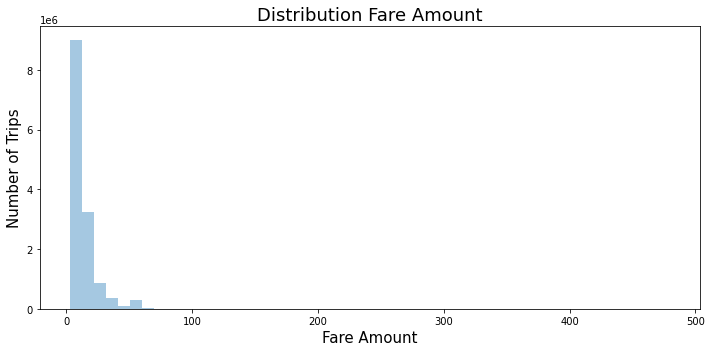

In [25]:
plt.figure(figsize=(10,5))
 
sns.distplot(taxi_trip_df['fare_amount'], kde=False)
plt.xlabel("Fare Amount", size=15)
plt.ylabel("Number of Trips", size=15)
plt.title("Distribution Fare Amount", size=18)
plt.tight_layout()
plt.show()

The fare amount is definitely left skewed, the average fare amount being $. During modelling we might have to remove high fare amounts. We can use the z-score to calculate the range in which most of our fares lie and then take a decision based on that.

#### Tip Amount Distribution

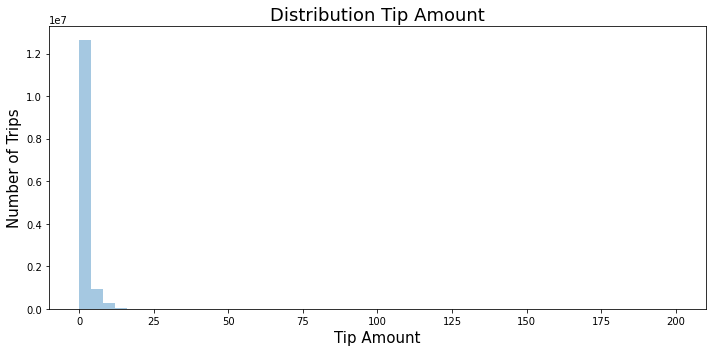

In [26]:
plt.figure(figsize=(10,5))
 
sns.distplot(taxi_trip_df['tip_amount'], kde=False)
plt.xlabel("Tip Amount", size=15)
plt.ylabel("Number of Trips", size=15)
plt.title("Distribution Tip Amount", size=18)
plt.tight_layout()
plt.show()

The tip amount is also very left skewed. We may have to alter the data before we predict the tip amount.

#### Times vs Fares

In [27]:
demo_df = taxi_trip_df.copy()

In [28]:
demo_df['pickup_hour'] = taxi_trip_df['pickup_datetime'].dt.hour
demo_df['dropoff_hour'] = taxi_trip_df['dropoff_datetime'].dt.hour

In [29]:
demo_df

,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,...,avg_speed,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,pickup_hour,dropoff_hour
0,740BD5BE61840BE4FE3905CC3EBE3E7E,E48B185060FB0FF49BE6DA43E69E624B,CMT,1,2013-10-01 12:44:29,2013-10-01 12:53:26,1,536,1.2,-73.974319,...,8.044693,CRD,8.0,0.0,0.5,2.10,0.0,10.60,12,12
1,EA05309C30F375695F44C96108ACB10F,1D10D8AC5B07D80861761365A05A9AE2,CMT,1,2013-10-02 19:44:55,2013-10-02 20:03:55,1,1139,5.1,-73.981239,...,16.105263,CRD,18.0,1.0,0.5,3.00,0.0,22.50,19,20
2,EA05309C30F375695F44C96108ACB10F,1D10D8AC5B07D80861761365A05A9AE2,CMT,1,2013-10-02 22:01:18,2013-10-02 22:09:18,1,480,2.2,-74.002991,...,16.500000,CRD,9.5,0.5,0.5,2.10,0.0,12.60,22,22
3,B36D7AB5B422EA1A0588EFD1D8155EF3,669F420B42A0739A5D1058184AD227ED,CMT,1,2013-10-03 12:14:35,2013-10-03 12:26:04,1,689,0.9,-73.967178,...,4.702467,CRD,8.5,0.0,0.5,1.80,0.0,10.80,12,12
4,28172009F5513B25F4091C0929C4515D,ABE08BCFEBF3F5F7339CA2170EEC1DEE,CMT,1,2013-10-02 00:33:37,2013-10-02 01:06:16,1,1959,14.8,-73.784142,...,27.197550,CRD,43.0,0.5,0.5,11.00,0.0,55.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13895204,3FD555B8EA958A8AC0A50FCBEDED5CE2,A59A74F32FDFB59430AAC596A2B54FA6,CMT,1,2013-10-07 20:24:34,2013-10-07 20:30:22,1,347,1.0,-73.968300,...,10.344828,CRD,6.0,0.5,0.5,1.00,0.0,8.00,20,20
13895205,F72C82AFFA243C164EA00B43398EDFCD,1B8B820092E36B6BDEF66B2B836A5E1F,CMT,1,2013-10-08 17:34:04,2013-10-08 17:42:27,3,502,1.1,-73.985168,...,7.872763,CRD,7.0,1.0,0.5,2.10,0.0,10.60,17,17
13895206,400E7547B850AB2C980B02293A279988,265712C4B013561E39DA4EF5700BC8F0,CMT,1,2013-10-09 21:56:46,2013-10-09 22:03:43,1,416,1.8,-73.998978,...,15.539568,CRD,8.0,0.5,0.5,1.80,0.0,10.80,21,22
13895207,C612423A09BF7298B817EBB674E7DC11,F3E5CC66E8544AF5FF67DFB70B6A7481,CMT,1,2013-10-10 02:11:50,2013-10-10 02:17:49,1,359,1.1,-73.985756,...,11.030641,CRD,6.5,0.5,0.5,1.50,0.0,9.00,2,2


In [30]:
demo_df['fare_amount'].max()

480.0

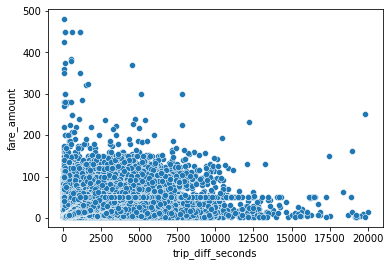

In [31]:
ax=sns.scatterplot(x=demo_df['trip_diff_seconds'],y=demo_df['fare_amount'],data=demo_df)
plt.show()

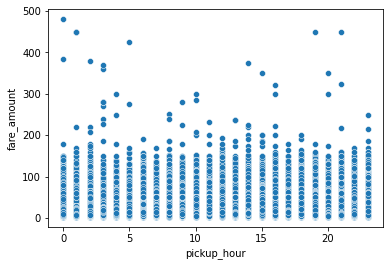

In [32]:
ax=sns.scatterplot(x=demo_df['pickup_hour'],y=demo_df['fare_amount'],data=demo_df)
plt.show()

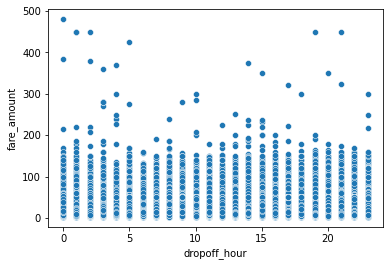

In [33]:
ax=sns.scatterplot(x=demo_df['dropoff_hour'],y=demo_df['fare_amount'],data=demo_df)
plt.show()

### Characterize drivers based on work hours and the amount they make

In [34]:
taxi_trip_df.head()

,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,...,trip_dist_miles,trip_diff_seconds,avg_speed,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,740BD5BE61840BE4FE3905CC3EBE3E7E,E48B185060FB0FF49BE6DA43E69E624B,CMT,1,2013-10-01 12:44:29,2013-10-01 12:53:26,1,536,1.2,-73.974319,...,0.884191,537.0,8.044693,CRD,8.0,0.0,0.5,2.1,0.0,10.6
1,EA05309C30F375695F44C96108ACB10F,1D10D8AC5B07D80861761365A05A9AE2,CMT,1,2013-10-02 19:44:55,2013-10-02 20:03:55,1,1139,5.1,-73.981239,...,2.075469,1140.0,16.105263,CRD,18.0,1.0,0.5,3.0,0.0,22.5
2,EA05309C30F375695F44C96108ACB10F,1D10D8AC5B07D80861761365A05A9AE2,CMT,1,2013-10-02 22:01:18,2013-10-02 22:09:18,1,480,2.2,-74.002991,...,0.454633,480.0,16.500000,CRD,9.5,0.5,0.5,2.1,0.0,12.6
3,B36D7AB5B422EA1A0588EFD1D8155EF3,669F420B42A0739A5D1058184AD227ED,CMT,1,2013-10-03 12:14:35,2013-10-03 12:26:04,1,689,0.9,-73.967178,...,0.889170,689.0,4.702467,CRD,8.5,0.0,0.5,1.8,0.0,10.8
4,28172009F5513B25F4091C0929C4515D,ABE08BCFEBF3F5F7339CA2170EEC1DEE,CMT,1,2013-10-02 00:33:37,2013-10-02 01:06:16,1,1959,14.8,-73.784142,...,10.234611,1959.0,27.197550,CRD,43.0,0.5,0.5,11.0,0.0,55.0


In [35]:
taxi_trip_df['pickup_weekday'] = taxi_trip_df['pickup_datetime'].dt.dayofweek
taxi_trip_df['pickup_hour'] = taxi_trip_df['pickup_datetime'].dt.hour
taxi_trip_df['pickup_day_name'] = taxi_trip_df['pickup_datetime'].dt.day_name()

In [36]:
taxi_trip_df.head()

,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,...,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,pickup_weekday,pickup_hour,pickup_day_name
0,740BD5BE61840BE4FE3905CC3EBE3E7E,E48B185060FB0FF49BE6DA43E69E624B,CMT,1,2013-10-01 12:44:29,2013-10-01 12:53:26,1,536,1.2,-73.974319,...,CRD,8.0,0.0,0.5,2.1,0.0,10.6,1,12,Tuesday
1,EA05309C30F375695F44C96108ACB10F,1D10D8AC5B07D80861761365A05A9AE2,CMT,1,2013-10-02 19:44:55,2013-10-02 20:03:55,1,1139,5.1,-73.981239,...,CRD,18.0,1.0,0.5,3.0,0.0,22.5,2,19,Wednesday
2,EA05309C30F375695F44C96108ACB10F,1D10D8AC5B07D80861761365A05A9AE2,CMT,1,2013-10-02 22:01:18,2013-10-02 22:09:18,1,480,2.2,-74.002991,...,CRD,9.5,0.5,0.5,2.1,0.0,12.6,2,22,Wednesday
3,B36D7AB5B422EA1A0588EFD1D8155EF3,669F420B42A0739A5D1058184AD227ED,CMT,1,2013-10-03 12:14:35,2013-10-03 12:26:04,1,689,0.9,-73.967178,...,CRD,8.5,0.0,0.5,1.8,0.0,10.8,3,12,Thursday
4,28172009F5513B25F4091C0929C4515D,ABE08BCFEBF3F5F7339CA2170EEC1DEE,CMT,1,2013-10-02 00:33:37,2013-10-02 01:06:16,1,1959,14.8,-73.784142,...,CRD,43.0,0.5,0.5,11.0,0.0,55.0,2,0,Wednesday


In [37]:
taxi_trip_df.columns

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_time_in_secs', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'trip_dist_miles', 'trip_diff_seconds', 'avg_speed', 'payment_type',
       'fare_amount', 'surcharge', 'mta_tax', 'tip_amount', 'tolls_amount',
       'total_amount', 'pickup_weekday', 'pickup_hour', 'pickup_day_name'],
      dtype='object')

In [38]:
taxi_trip_df['pickup_weekday'].unique()

array([1, 2, 3, 4, 5, 6, 0])

In [39]:
hrs_amt_df = taxi_trip_df[['pickup_day_name', 'pickup_hour', 'total_amount']]

In [40]:
hrs_amt_df

,pickup_day_name,pickup_hour,total_amount
0,Tuesday,12,10.60
1,Wednesday,19,22.50
2,Wednesday,22,12.60
3,Thursday,12,10.80
4,Wednesday,0,55.00
...,...,...,...
13895204,Monday,20,8.00
13895205,Tuesday,17,10.60
13895206,Wednesday,21,10.80
13895207,Thursday,2,9.00


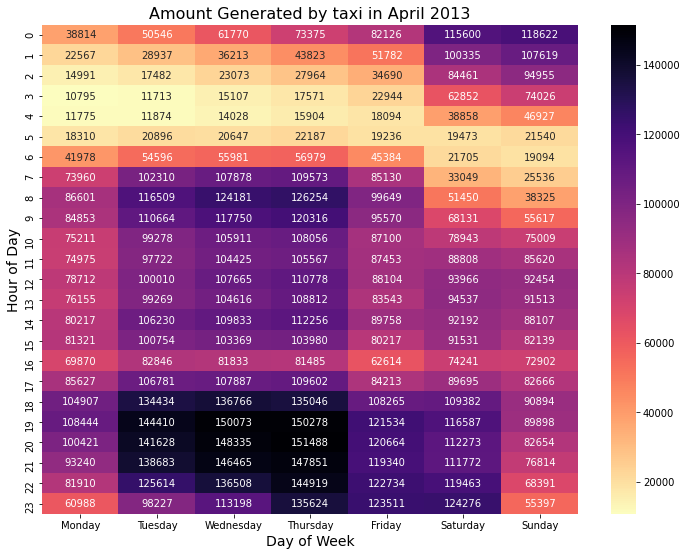

In [44]:
hrly_amt_df = hrs_amt_df.groupby(['pickup_day_name','pickup_hour'])['total_amount'].size().reset_index()
hrly_amt_piv = pd.pivot_table(hrly_amt_df, values="total_amount",index=["pickup_hour"], columns=["pickup_day_name"], fill_value=0)
hrly_amt_piv = hrly_amt_piv[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]

# plotting the pivot table
fig, ax = plt.subplots(figsize=(12,9))
ax = sns.heatmap(hrly_amt_piv, ax=ax, cmap='magma_r', annot=True, fmt="d")
ax.set_xlabel('Day of Week', fontsize=14)
ax.set_ylabel('Hour of Day', fontsize=14)
ax.set_title('Amount Generated by taxi in April 2013', fontsize=16)
None

#### Additional Analysis

In [45]:
taxi_trip_df['date'] = taxi_trip_df['pickup_datetime'].dt.date

In [46]:
# Average daily earnings of a taxicab
taxi_trip_df.groupby(['medallion', 'date'])['total_amount'].sum().mean()

539.7152054849626

In [48]:
taxi_trip_df.groupby(['medallion', 'date'])['total_amount'].sum().sort_values(ascending=False).head(10)

medallion                         date      
C85F202D4400ACD406CB4DE6850A0EDB  2013-10-04    1237.93
A1820C0C2A66AE0404C695FEA70C5969  2013-10-13    1192.92
638DE546EB32ADF9918A33040A20F9E3  2013-10-04    1188.84
C6F2E1E6FE30587F991E9B89B53F7D42  2013-10-04    1184.76
C78F6ED99E72F27BD00EDDD768F9B61B  2013-10-13    1164.79
8DEB70907D00AA1D7FF5E2683240549B  2013-10-25    1141.86
A641757F3588ED83C7C45972F6B533AD  2013-10-27    1127.41
8C3DB699DA9D5A86780602001DF0892D  2013-10-06    1120.08
E661B8FDCFC87DBFC9BB6C5F9D393F69  2013-10-20    1117.58
2A9D60D746CC8C9F1DADE65B9BCE76CB  2013-10-20    1104.38
Name: total_amount, dtype: float64

In [47]:
# Average daily earnings of a taxi driver
taxi_trip_df.groupby(['hack_license', 'date'])['total_amount'].sum().mean()

289.5706436539732

In [49]:
taxi_trip_df.groupby(['hack_license', 'date'])['total_amount'].sum().sort_values(ascending=False).head(10)

hack_license                      date      
E66839CB5F1411C6950AE611135E063F  2013-10-27    1371.70
BA69ACDD10A82EEF4A9D484CF5739C06  2013-10-21    1258.02
                                  2013-10-23    1123.71
A8DBF87EB98D5750B2801318B90D7048  2013-10-06    1120.08
D85749E8852FCC66A990E40605607B2F  2013-10-25    1009.08
8C910084DA8D1898E10A245E6EC1C303  2013-10-27    1005.22
BA69ACDD10A82EEF4A9D484CF5739C06  2013-10-22    1002.28
D85749E8852FCC66A990E40605607B2F  2013-10-15     999.42
                                  2013-10-03     988.95
BA69ACDD10A82EEF4A9D484CF5739C06  2013-10-07     976.82
Name: total_amount, dtype: float64

In [54]:
location_df2 = taxi_trip_df.copy()
location_df2['pickup_coordinates'] = location_df2['pickup_latitude'].round(2).astype(str) + ", " + location_df2['pickup_longitude'].round(2).astype(str)
location_df2['dropoff_coordinates'] = location_df2['dropoff_latitude'].round(2).astype(str) + ", " + location_df2['dropoff_longitude'].round(2).astype(str)
location_df2['route'] = location_df2['pickup_coordinates'] + ' : ' + location_df2['dropoff_coordinates']

In [57]:
max_rev_route_per_day = location_df2.groupby(['route', 'date'])['total_amount'].sum().sort_values(ascending=False).reset_index()
max_rev_route_per_day

,route,date,total_amount
0,"40.77, -73.87 : 40.76, -73.98",2013-10-28,35756.63
1,"40.77, -73.87 : 40.76, -73.98",2013-10-09,35395.61
2,"40.77, -73.87 : 40.76, -73.98",2013-10-23,35346.75
3,"40.77, -73.87 : 40.76, -73.98",2013-10-16,34617.71
4,"40.77, -73.87 : 40.76, -73.98",2013-10-24,34391.68
...,...,...,...
622137,"40.71, -74.0 : 40.75, -73.89",2013-10-08,3.00
622138,"40.77, -73.87 : 40.88, -73.82",2013-10-18,3.00
622139,"40.62, -73.95 : 40.62, -73.95",2013-10-24,3.00
622140,"40.65, -73.79 : 40.66, -73.79",2013-10-11,3.00


In [58]:
max_rev_route_per_day.head(20)

,route,date,total_amount
0,"40.77, -73.87 : 40.76, -73.98",2013-10-28,35756.63
1,"40.77, -73.87 : 40.76, -73.98",2013-10-09,35395.61
2,"40.77, -73.87 : 40.76, -73.98",2013-10-23,35346.75
3,"40.77, -73.87 : 40.76, -73.98",2013-10-16,34617.71
4,"40.77, -73.87 : 40.76, -73.98",2013-10-24,34391.68
5,"40.77, -73.87 : 40.76, -73.98",2013-10-17,34147.55
6,"40.77, -73.87 : 40.76, -73.98",2013-10-07,33016.00
7,"40.77, -73.87 : 40.76, -73.98",2013-10-10,32613.07
8,"40.77, -73.87 : 40.76, -73.98",2013-10-22,32347.17
9,"40.77, -73.87 : 40.76, -73.98",2013-10-15,32234.33


In [59]:
max_rev_route = location_df2.groupby(['route'])['total_amount'].agg({sum, len}).reset_index()
max_rev_route.sort_values(['sum', 'len'], ascending=[False, False]).head(20)

,route,sum,len
56831,"40.77, -73.87 : 40.76, -73.98",797365.25,17864.0
46736,"40.75, -73.99 : 40.76, -73.98",674090.89,69380.0
53082,"40.76, -73.98 : 40.77, -73.87",642618.19,14863.0
52128,"40.76, -73.97 : 40.75, -73.99",600505.16,47788.0
56830,"40.77, -73.87 : 40.76, -73.97",560380.10,13611.0
46735,"40.75, -73.99 : 40.76, -73.97",534479.73,44015.0
53021,"40.76, -73.98 : 40.75, -73.99",532708.61,51901.0
60586,"40.77, -73.96 : 40.76, -73.97",517719.59,58793.0
52127,"40.76, -73.97 : 40.75, -73.98",493955.52,55562.0
56832,"40.77, -73.87 : 40.76, -73.99",491403.80,10763.0


#### Top 10 Routes based on highest earning

In [76]:
top_10_rev_route = max_rev_route.sort_values(['sum', 'len'], ascending=[False, False]).head(10)

In [89]:
z = '40.77, -73.87 : 40.76, -73.98'
zi = z[:13]
print(z[:13])
print(z[16:])
print(zi[:5])
print(zi[7:])

40.77, -73.87
40.76, -73.98
40.77
-73.87


In [78]:
top_10_rev_route['pickup_coordinates'] = ''
top_10_rev_route['dropoff_coordinates'] = ''

for ind in top_10_rev_route.index:
    top_10_rev_route['pickup_coordinates'][ind] = top_10_rev_route['route'][ind][:13]
    top_10_rev_route['dropoff_coordinates'][ind] = top_10_rev_route['route'][ind][16:]
    

/home/ml/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/ml/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [79]:
top_10_rev_route

,route,sum,len,pickup_coordinates,dropoff_coordinates
56831,"40.77, -73.87 : 40.76, -73.98",797365.25,17864.0,"40.77, -73.87","40.76, -73.98"
46736,"40.75, -73.99 : 40.76, -73.98",674090.89,69380.0,"40.75, -73.99","40.76, -73.98"
53082,"40.76, -73.98 : 40.77, -73.87",642618.19,14863.0,"40.76, -73.98","40.77, -73.87"
52128,"40.76, -73.97 : 40.75, -73.99",600505.16,47788.0,"40.76, -73.97","40.75, -73.99"
56830,"40.77, -73.87 : 40.76, -73.97",560380.10,13611.0,"40.77, -73.87","40.76, -73.97"
46735,"40.75, -73.99 : 40.76, -73.97",534479.73,44015.0,"40.75, -73.99","40.76, -73.97"
53021,"40.76, -73.98 : 40.75, -73.99",532708.61,51901.0,"40.76, -73.98","40.75, -73.99"
60586,"40.77, -73.96 : 40.76, -73.97",517719.59,58793.0,"40.77, -73.96","40.76, -73.97"
52127,"40.76, -73.97 : 40.75, -73.98",493955.52,55562.0,"40.76, -73.97","40.75, -73.98"
56832,"40.77, -73.87 : 40.76, -73.99",491403.80,10763.0,"40.77, -73.87","40.76, -73.99"


In [80]:
# generating an extra column calculating the geodesic distance formula from 
top_10_rev_route['pickup_location'] = top_10_rev_route.apply(
    (lambda row: geolocator.reverse(row['pickup_coordinates'])[0]),
    axis=1
)
# generating an extra column calculating the geodesic distance formula from 
top_10_rev_route['dropoff_location'] = top_10_rev_route.apply(
    (lambda row: geolocator.reverse(row['dropoff_coordinates'])[0]),
    axis=1
)
top_10_rev_route

,route,sum,len,pickup_coordinates,dropoff_coordinates,pickup_location,dropoff_location
56831,"40.77, -73.87 : 40.76, -73.98",797365.25,17864.0,"40.77, -73.87","40.76, -73.98","Aloft New York LaGuardia Airport, 100-15, Ditm...","Rockefeller Center, 45, Rockefeller Plaza, Mid..."
46736,"40.75, -73.99 : 40.76, -73.98",674090.89,69380.0,"40.75, -73.99","40.76, -73.98","137, West 33rd Street, Herald Square, Manhatta...","Rockefeller Center, 45, Rockefeller Plaza, Mid..."
53082,"40.76, -73.98 : 40.77, -73.87",642618.19,14863.0,"40.76, -73.98","40.77, -73.87","Rockefeller Center, 45, Rockefeller Plaza, Mid...","Aloft New York LaGuardia Airport, 100-15, Ditm..."
52128,"40.76, -73.97 : 40.75, -73.99",600505.16,47788.0,"40.76, -73.97","40.75, -73.99","664, Lexington Avenue, Midtown East, Manhattan...","137, West 33rd Street, Herald Square, Manhatta..."
56830,"40.77, -73.87 : 40.76, -73.97",560380.10,13611.0,"40.77, -73.87","40.76, -73.97","Aloft New York LaGuardia Airport, 100-15, Ditm...","664, Lexington Avenue, Midtown East, Manhattan..."
46735,"40.75, -73.99 : 40.76, -73.97",534479.73,44015.0,"40.75, -73.99","40.76, -73.97","137, West 33rd Street, Herald Square, Manhatta...","664, Lexington Avenue, Midtown East, Manhattan..."
53021,"40.76, -73.98 : 40.75, -73.99",532708.61,51901.0,"40.76, -73.98","40.75, -73.99","Rockefeller Center, 45, Rockefeller Plaza, Mid...","137, West 33rd Street, Herald Square, Manhatta..."
60586,"40.77, -73.96 : 40.76, -73.97",517719.59,58793.0,"40.77, -73.96","40.76, -73.97","Dallas BBQ, 1265, 3rd Avenue, Upper East Side,...","664, Lexington Avenue, Midtown East, Manhattan..."
52127,"40.76, -73.97 : 40.75, -73.98",493955.52,55562.0,"40.76, -73.97","40.75, -73.98","664, Lexington Avenue, Midtown East, Manhattan...","35, East 38th Street, Murray Hill, Manhattan, ..."
56832,"40.77, -73.87 : 40.76, -73.99",491403.80,10763.0,"40.77, -73.87","40.76, -73.99","Aloft New York LaGuardia Airport, 100-15, Ditm...","341, West 45th Street, Theater District, Manha..."


In [83]:
# !pip3 install folium

In [84]:
import folium

In [96]:
def plot_lines(pickup_coordinates, dropoff_coordinates):
    for i in range(len(top_10_rev_route)):
        p1 = [float(pickup_coordinates[i][:5]), float(pickup_coordinates[i][7:])]
        p2 = [float(dropoff_coordinates[i][:5]), float(dropoff_coordinates[i][7:])]
        folium.PolyLine(locations=[p1, p2], color='blue').add_to(m)

In [100]:
m = folium.Map(location=[40.73, -74.0060])
plot_lines(top_10_rev_route['pickup_coordinates'].to_list(), top_10_rev_route['dropoff_coordinates'].to_list())
m

In [98]:
# pickup_coordinates, dropoff_coordinates = top_10_rev_route['pickup_coordinates'].to_list(), top_10_rev_route['dropoff_coordinates'].to_list()
# for i in range(len(top_10_rev_route)):
#     print(pickup_coordinates[i][:5])
#     print(dropoff_coordinates[i])

In [99]:
# for each in top_10_rev_route['pickup_coordinates'].to_list():
#     print(each[:5])
#     print(each[7:])

In [79]:
taxi_trip_df

,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,...,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,pickup_weekday,pickup_hour,pickup_day_name
0,740BD5BE61840BE4FE3905CC3EBE3E7E,E48B185060FB0FF49BE6DA43E69E624B,CMT,1,2013-10-01 12:44:29,2013-10-01 12:53:26,1,536,1.2,-73.974319,...,CRD,8.0,0.0,0.5,2.10,0.0,10.60,1,12,Tuesday
1,EA05309C30F375695F44C96108ACB10F,1D10D8AC5B07D80861761365A05A9AE2,CMT,1,2013-10-02 19:44:55,2013-10-02 20:03:55,1,1139,5.1,-73.981239,...,CRD,18.0,1.0,0.5,3.00,0.0,22.50,2,19,Wednesday
2,EA05309C30F375695F44C96108ACB10F,1D10D8AC5B07D80861761365A05A9AE2,CMT,1,2013-10-02 22:01:18,2013-10-02 22:09:18,1,480,2.2,-74.002991,...,CRD,9.5,0.5,0.5,2.10,0.0,12.60,2,22,Wednesday
3,B36D7AB5B422EA1A0588EFD1D8155EF3,669F420B42A0739A5D1058184AD227ED,CMT,1,2013-10-03 12:14:35,2013-10-03 12:26:04,1,689,0.9,-73.967178,...,CRD,8.5,0.0,0.5,1.80,0.0,10.80,3,12,Thursday
4,28172009F5513B25F4091C0929C4515D,ABE08BCFEBF3F5F7339CA2170EEC1DEE,CMT,1,2013-10-02 00:33:37,2013-10-02 01:06:16,1,1959,14.8,-73.784142,...,CRD,43.0,0.5,0.5,11.00,0.0,55.00,2,0,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13895204,3FD555B8EA958A8AC0A50FCBEDED5CE2,A59A74F32FDFB59430AAC596A2B54FA6,CMT,1,2013-10-07 20:24:34,2013-10-07 20:30:22,1,347,1.0,-73.968300,...,CRD,6.0,0.5,0.5,1.00,0.0,8.00,0,20,Monday
13895205,F72C82AFFA243C164EA00B43398EDFCD,1B8B820092E36B6BDEF66B2B836A5E1F,CMT,1,2013-10-08 17:34:04,2013-10-08 17:42:27,3,502,1.1,-73.985168,...,CRD,7.0,1.0,0.5,2.10,0.0,10.60,1,17,Tuesday
13895206,400E7547B850AB2C980B02293A279988,265712C4B013561E39DA4EF5700BC8F0,CMT,1,2013-10-09 21:56:46,2013-10-09 22:03:43,1,416,1.8,-73.998978,...,CRD,8.0,0.5,0.5,1.80,0.0,10.80,2,21,Wednesday
13895207,C612423A09BF7298B817EBB674E7DC11,F3E5CC66E8544AF5FF67DFB70B6A7481,CMT,1,2013-10-10 02:11:50,2013-10-10 02:17:49,1,359,1.1,-73.985756,...,CRD,6.5,0.5,0.5,1.50,0.0,9.00,3,2,Thursday


In [85]:
location_df

,passenger_count,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,pickup_coordinates,dropoff_coordinates
0,1,40.741859,-73.974319,40.742424,-73.991150,"40.74, -73.97","40.74, -73.99"
1,1,40.729141,-73.981239,40.719715,-73.943695,"40.73, -73.98","40.72, -73.94"
2,1,40.733540,-74.002991,40.727261,-74.005615,"40.73, -74.0","40.73, -74.01"
3,1,40.766563,-73.967178,40.755947,-73.976784,"40.77, -73.97","40.76, -73.98"
4,1,40.648621,-73.784142,40.672001,-73.976479,"40.65, -73.78","40.67, -73.98"
...,...,...,...,...,...,...,...
13895204,1,40.761284,-73.968300,40.764042,-73.954254,"40.76, -73.97","40.76, -73.95"
13895205,3,40.744778,-73.985168,40.751343,-73.971329,"40.74, -73.99","40.75, -73.97"
13895206,1,40.760948,-73.998978,40.777672,-73.979179,"40.76, -74.0","40.78, -73.98"
13895207,1,40.759457,-73.985756,40.766560,-73.991600,"40.76, -73.99","40.77, -73.99"


In [108]:
location_df['full_pickup_coordinates'] = location_df['pickup_latitude'].astype(str) + ", " + location_df['pickup_longitude'].astype(str)
location_df['full_dropoff_coordinates'] = location_df['dropoff_latitude'].astype(str) + ", " + location_df['dropoff_longitude'].astype(str) 

/home/ml/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/ml/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [109]:
location_df

,passenger_count,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,pickup_coordinates,dropoff_coordinates,full_pickup_coordinates,full_dropoff_coordinates
0,1,40.741859,-73.974319,40.742424,-73.991150,"40.74, -73.97","40.74, -73.99","40.74185900000001, -73.974319","40.742424, -73.99115"
1,1,40.729141,-73.981239,40.719715,-73.943695,"40.73, -73.98","40.72, -73.94","40.729141, -73.981239","40.719715, -73.94369499999998"
2,1,40.733540,-74.002991,40.727261,-74.005615,"40.73, -74.0","40.73, -74.01","40.73354000000001, -74.00299100000002","40.727261, -74.005615"
3,1,40.766563,-73.967178,40.755947,-73.976784,"40.77, -73.97","40.76, -73.98","40.766563, -73.967178","40.755947, -73.976784"
4,1,40.648621,-73.784142,40.672001,-73.976479,"40.65, -73.78","40.67, -73.98","40.648621, -73.784142","40.672001, -73.976479"
...,...,...,...,...,...,...,...,...,...
13895204,1,40.761284,-73.968300,40.764042,-73.954254,"40.76, -73.97","40.76, -73.95","40.761284, -73.9683","40.764042, -73.954254"
13895205,3,40.744778,-73.985168,40.751343,-73.971329,"40.74, -73.99","40.75, -73.97","40.744778, -73.985168","40.751343, -73.971329"
13895206,1,40.760948,-73.998978,40.777672,-73.979179,"40.76, -74.0","40.78, -73.98","40.760948, -73.99897800000002","40.777672, -73.979179"
13895207,1,40.759457,-73.985756,40.766560,-73.991600,"40.76, -73.99","40.77, -73.99","40.759457, -73.98575600000002","40.76656, -73.9916"


In [116]:
coordinate_list = location_df['pickup_coordinates'].to_list()

In [117]:
len(coordinate_list)

13895209

In [118]:
coordinate_list.extend(location_df['dropoff_coordinates'].to_list())

In [119]:
len(coordinate_list)

27790418

In [120]:
distinct_coordinate_list = list(set(coordinate_list))

In [125]:
len(distinct_coordinate_list)

1673

In [126]:
distinct_coordinate_dict = {}

for coord in distinct_coordinate_list:
    suburb = geolocator.reverse(coord).raw['address'].get('suburb')
    if suburb:
        distinct_coordinate_dict[coord] = suburb
    else:
        distinct_coordinate_dict[coord] = geolocator.reverse(coord).raw['address'].get('borough')

In [100]:
# # generating an extra column calculating the geodesic distance formula from 
# location_df['dropoff_suburb'] = location_df.apply(
#     (lambda row: geolocator.reverse(row['dropoff_coordinates']).raw['address'].get('suburb')),
#     axis=1
# )

In [ ]:
# # generating an extra column calculating the geodesic distance formula from 
# location_df['pickup_suburb'] = location_df.apply(
#     (lambda row: geolocator.reverse(row['pickup_coordinates']).raw['address'].get('suburb')),
#     axis=1
# )

In [127]:
len(distinct_coordinate_dict)

1673

In [128]:
distinct_coordinate_dict

{'40.62, -74.07': 'Staten Island',
 '40.61, -74.14': 'Staten Island',
 '40.86, -74.05': None,
 '40.56, -73.93': 'Queens',
 '40.65, -73.89': 'Brooklyn',
 '40.83, -73.92': 'The Bronx',
 '40.82, -74.08': None,
 '40.66, -73.9': 'Brooklyn',
 '40.9, -74.07': None,
 '40.7, -73.72': None,
 '40.75, -74.04': None,
 '40.68, -74.21': None,
 '40.89, -74.01': None,
 '40.82, -73.81': 'The Bronx',
 '40.75, -74.11': None,
 '40.76, -73.89': 'Queens',
 '40.6, -73.74': 'Queens',
 '40.85, -74.16': None,
 '40.5, -74.01': None,
 '40.6, -73.73': None,
 '40.59, -73.73': None,
 '40.6, -73.96': 'Brooklyn',
 '40.52, -74.18': 'Staten Island',
 '40.6, -73.79': 'Queens',
 '40.83, -73.95': 'Manhattan',
 '40.89, -74.22': None,
 '40.58, -73.75': None,
 '40.65, -74.0': 'Brooklyn',
 '40.76, -73.82': 'Queens',
 '40.86, -74.12': None,
 '40.69, -73.92': 'Brooklyn',
 '40.7, -73.79': 'Queens',
 '40.68, -73.88': 'Brooklyn',
 '40.9, -73.98': None,
 '40.63, -74.1': 'Staten Island',
 '40.75, -73.85': 'Queens',
 '40.85, -74.09': N

In [98]:
geolocator.reverse('40.74, -73.99').raw['address'].get('suburb')

'Manhattan'

In [107]:
geolocator.reverse('40.74, -73.99').raw['address'].get('borough')

In [130]:
geolocator.reverse('40.78, -74.07').raw['address']

{'highway': 'Enterprise Avenue at Secaucus Road',
 'road': 'Enterprise Avenue North',
 'hamlet': 'Harmon Cove',
 'town': 'Secaucus',
 'county': 'Hudson County',
 'state': 'New Jersey',
 'postcode': '07094',
 'country': 'United States',
 'country_code': 'us'}

In [104]:
geolocator.reverse('40.85, -73.91').raw['address']

{'house_number': '16',
 'road': 'East 177th Street',
 'borough': 'The Bronx',
 'neighbourhood': 'Bronx County',
 'city': 'New York',
 'state': 'New York',
 'postcode': '10453',
 'country': 'United States',
 'country_code': 'us'}

In [ ]:
# generating an extra column calculating the geodesic distance formula from 
busy_pickup_location_df['pickup_location'] = busy_pickup_location_df.apply(
    (lambda row: geolocator.reverse(row['pickup_coordinates'])[0]),
    axis=1
)
busy_pickup_location_df

In [37]:
# Latitude='40.741859'
# Longitude='-73.974319'
# print(geolocator.reverse(Latitude+","+Longitude)[0])
# print(geolocator.reverse(Latitude+","+Longitude).raw['address'].get('suburb'))

# # location = geolocator.reverse(Latitude+","+Longitude)
# # location

In [38]:
# location[0]

In [39]:
# location.raw['address']

In [40]:
# type(location.raw['address'])

In [41]:
# location.raw['address'].get('neighbourhood')

In [42]:
# location.raw['address'].get('suburb')